# 线性代数

标量由只有一个元素的张量表示
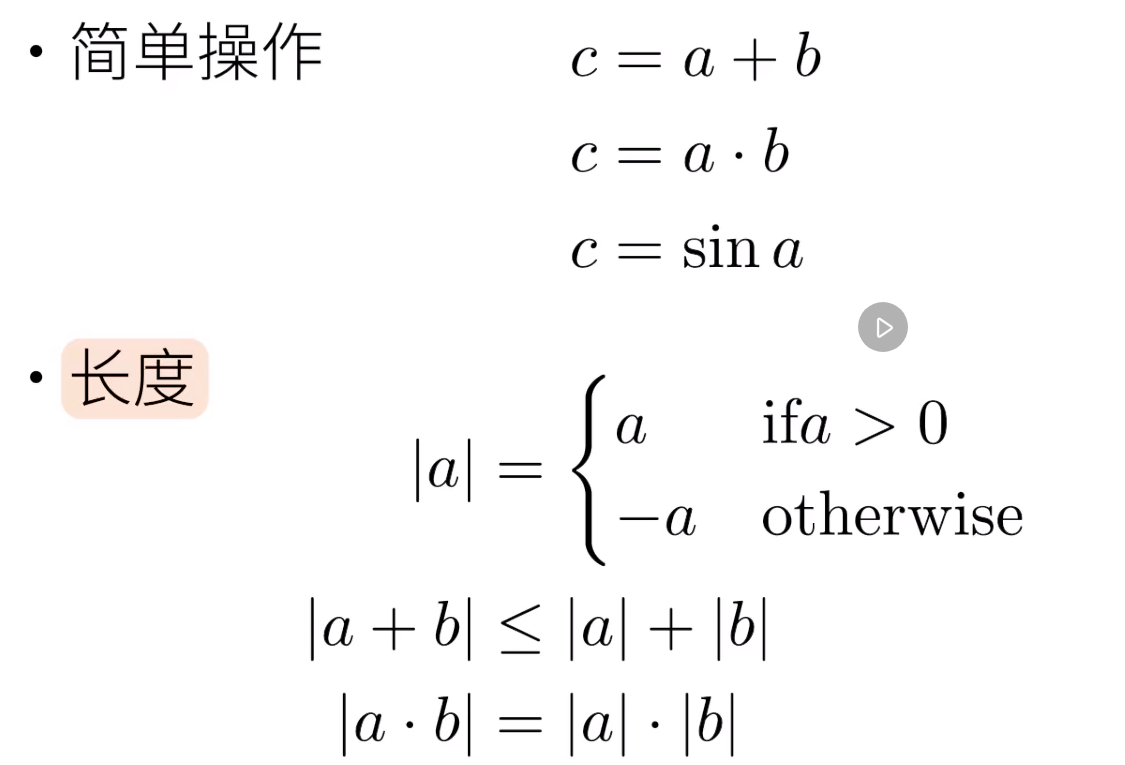

In [1]:
import torch

x = torch.tensor(3.0)#x=torch.tensor([3.0])
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

你可以将向量视为标量值组成的列表
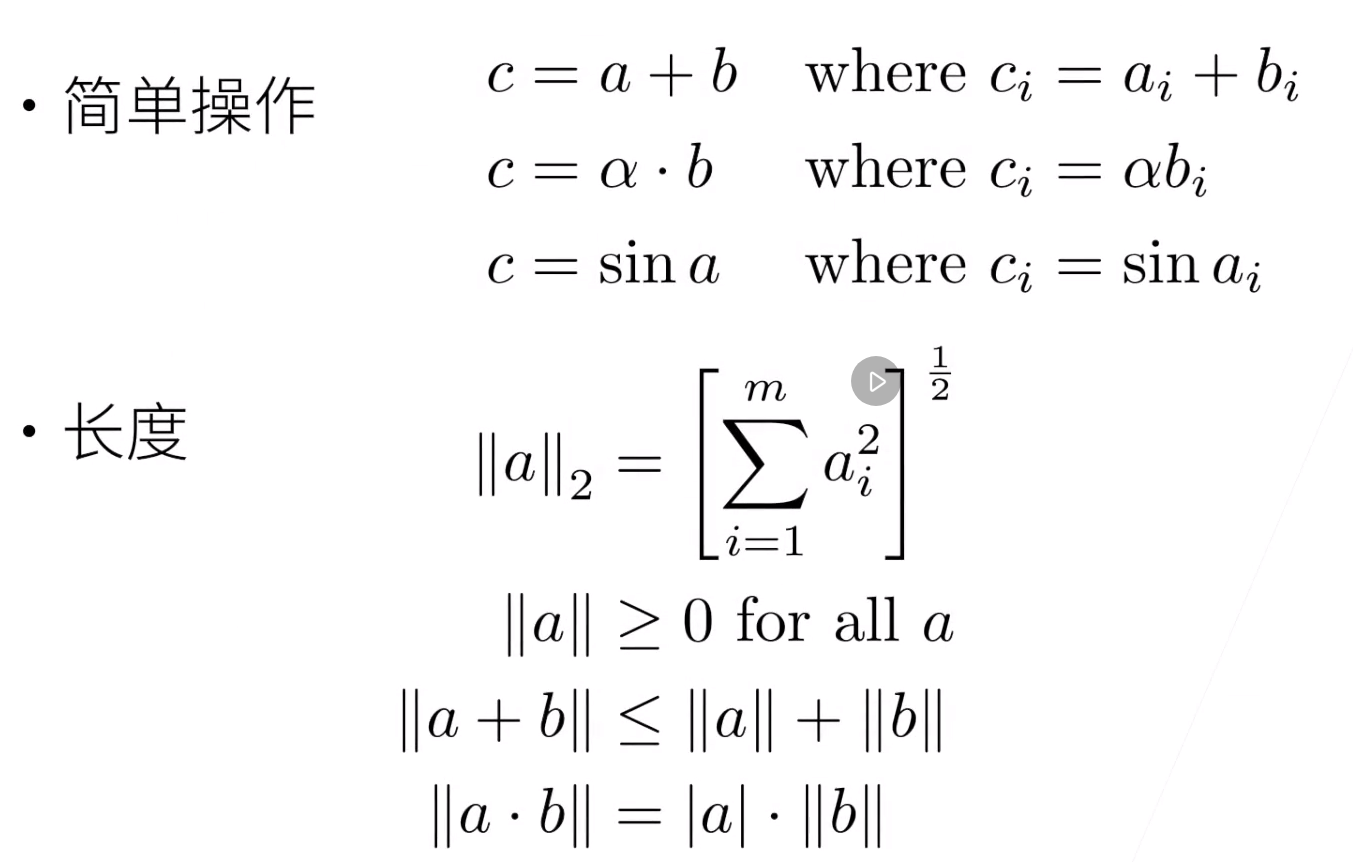
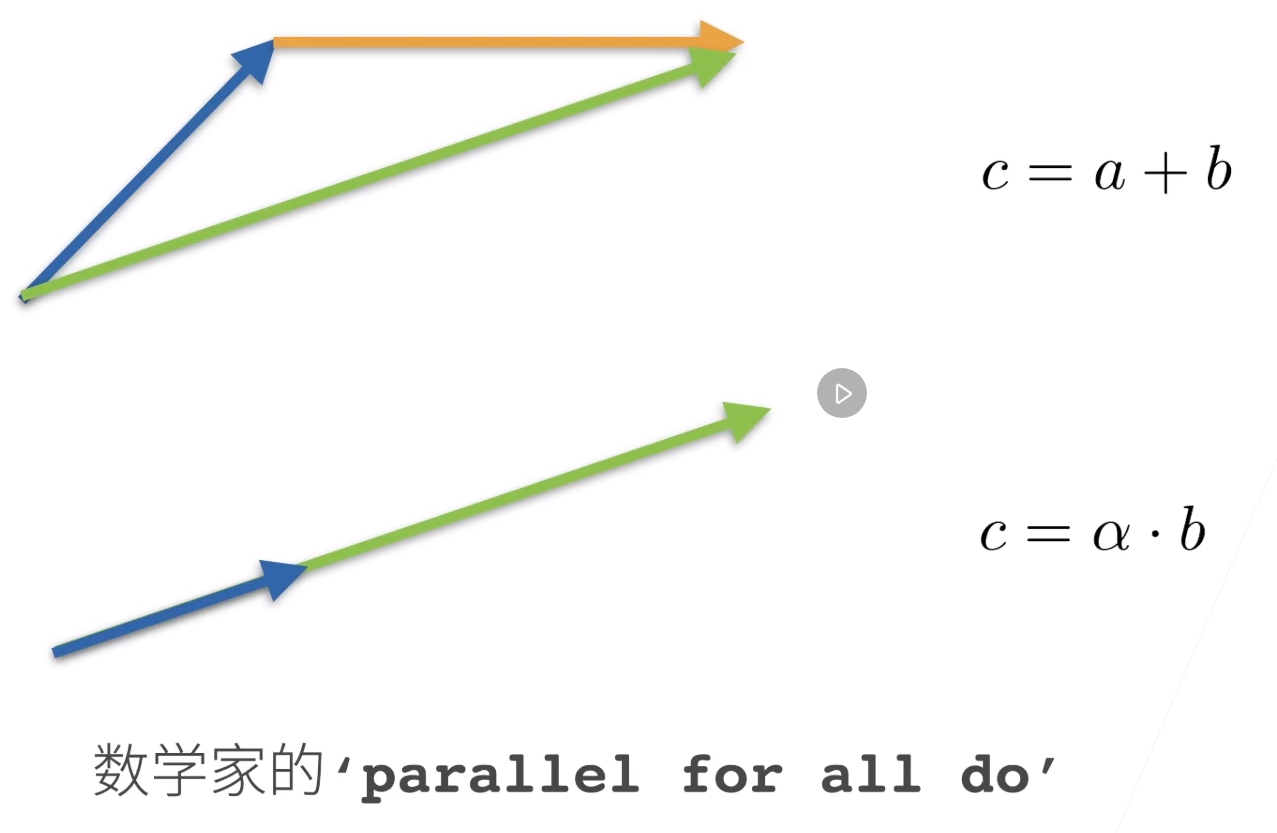
点乘，正交

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

通过张量的索引来访问任一元素

In [3]:
x[3]

tensor(3)

访问张量的长度

In [4]:
len(x)

4

只有一个轴的张量，形状只有一个元素

In [5]:
x.shape

torch.Size([4])

通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵
矩阵的几何意义：扭曲空间
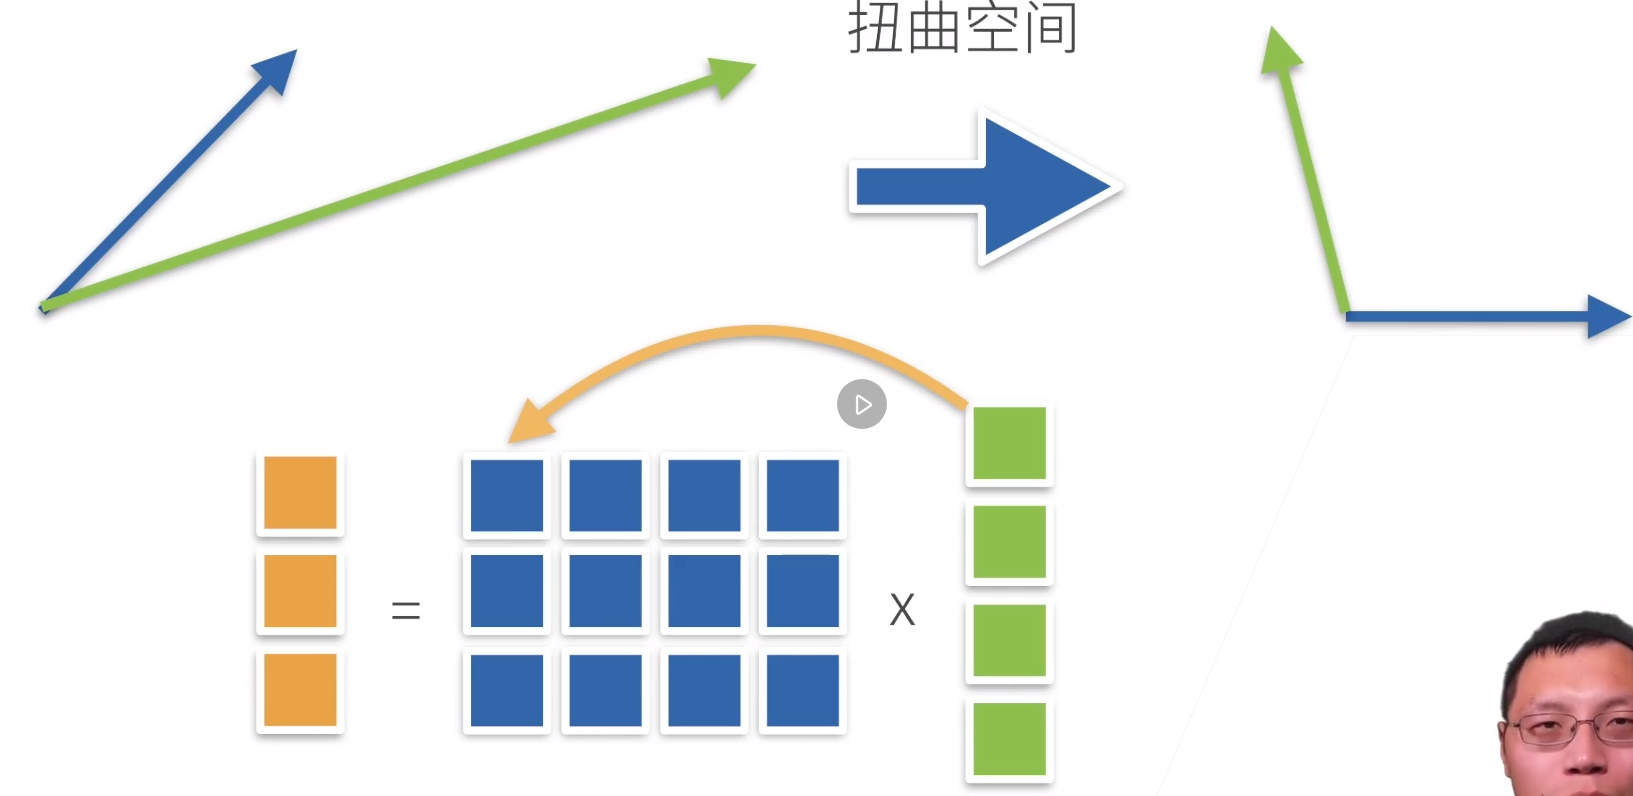

In [6]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

*对称矩阵*（symmetric matrix）$\mathbf{A}$等于其转置：$\mathbf{A} = \mathbf{A}^\top$

In [8]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [9]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构

In [10]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量

In [11]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为*Hadamard积*（Hadamard product）（数学符号$\odot$）

In [12]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [13]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape#所有元素都加a、乘a

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

计算其元素的和

In [14]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

表示任意形状张量的元素和

In [15]:
A= torch.arange(20*2).reshape(2,5,4)
A.shape, A.sum()
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]],

        [[20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35],
         [36, 37, 38, 39]]])

指定张量沿哪一个轴来通过求和降低维度
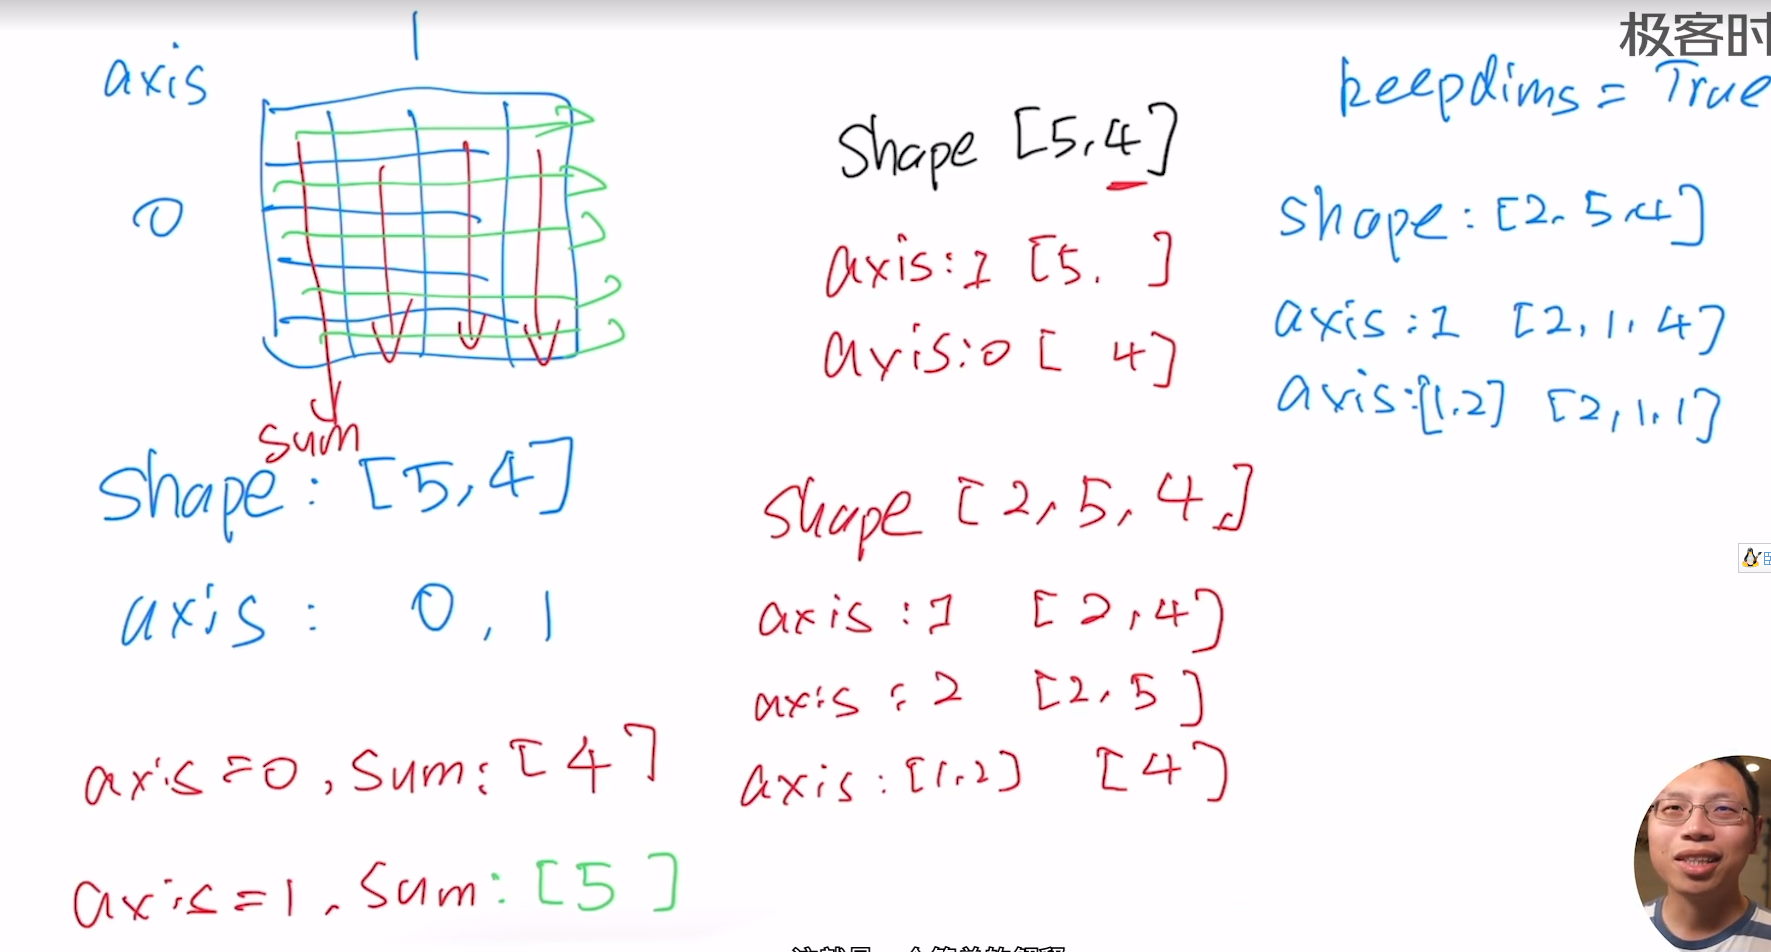

In [37]:
a = torch.ones((2,5,4))
a,a.shape

(tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 torch.Size([2, 5, 4]))

In [34]:
a.sum(axis=1).shape

torch.Size([2, 4])

In [38]:
a.sum(axis=[0,2]),a.sum(axis=[0,2]).shape

(tensor([8., 8., 8., 8., 8.]), torch.Size([5]))

In [41]:
a.sum(axis=[0,2],keepdims=True)

tensor([[[8.],
         [8.],
         [8.],
         [8.],
         [8.]]])

In [16]:
A_sum_axis0 = A.sum(axis=0)#0方向不动，剩下方向加和
A_sum_axis0, A_sum_axis0.shape

(tensor([[20, 22, 24, 26],
         [28, 30, 32, 34],
         [36, 38, 40, 42],
         [44, 46, 48, 50],
         [52, 54, 56, 58]]),
 torch.Size([5, 4]))

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([[ 40,  45,  50,  55],
         [140, 145, 150, 155]]),
 torch.Size([2, 4]))

In [18]:
A.sum(axis=[0, 1])

tensor([180, 190, 200, 210])

一个与求和相关的量是*平均值*（mean或average）

In [19]:
A=A.float()
A.mean(), A.sum() / A.numel()

(tensor(19.5000), tensor(19.5000))

In [20]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]),
 tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]))

计算总和或均值时保持轴数不变

In [21]:
sum_A = A.sum(axis=1, keepdims=True)#按维度求和会丢失维度，而通过keepdims可以保持轴数不变
sum_A.shape,sum_A

(torch.Size([2, 1, 4]),
 tensor([[[ 40.,  45.,  50.,  55.]],
 
         [[140., 145., 150., 155.]]]))

In [22]:
A.shape

torch.Size([2, 5, 4])

通过广播将`A`除以`sum_A`

In [23]:
A / sum_A

tensor([[[0.0000, 0.0222, 0.0400, 0.0545],
         [0.1000, 0.1111, 0.1200, 0.1273],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.3000, 0.2889, 0.2800, 0.2727],
         [0.4000, 0.3778, 0.3600, 0.3455]],

        [[0.1429, 0.1448, 0.1467, 0.1484],
         [0.1714, 0.1724, 0.1733, 0.1742],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.2286, 0.2276, 0.2267, 0.2258],
         [0.2571, 0.2552, 0.2533, 0.2516]]])

某个轴计算`A`元素的累积总和

In [24]:
A

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]])

In [25]:
A.cumsum(axis=0)#在第0维累加

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 22., 24., 26.],
         [28., 30., 32., 34.],
         [36., 38., 40., 42.],
         [44., 46., 48., 50.],
         [52., 54., 56., 58.]]])

点积是相同位置的按元素乘积的和

In [26]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积

In [27]:
torch.sum(x * y)

tensor(6.)

矩阵向量积$\mathbf{A}\mathbf{x}$是一个长度为$m$的列向量，
其第$i$个元素是点积$\mathbf{a}^\top_i \mathbf{x}$(a的第i行和x做点积）

In [28]:
A=torch.arange(20).reshape(5,4).float()
A,x,A.shape, x.shape, torch.mv(A, x)#mv:matrix vector multiplication(矩阵向量乘法)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]),
 torch.Size([5, 4]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作是简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵

In [29]:
B = torch.ones(4, 3)
A,B,torch.mm(A, B)#mm:Matrix Matrix Multiplication（矩阵矩阵乘法）

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

范数
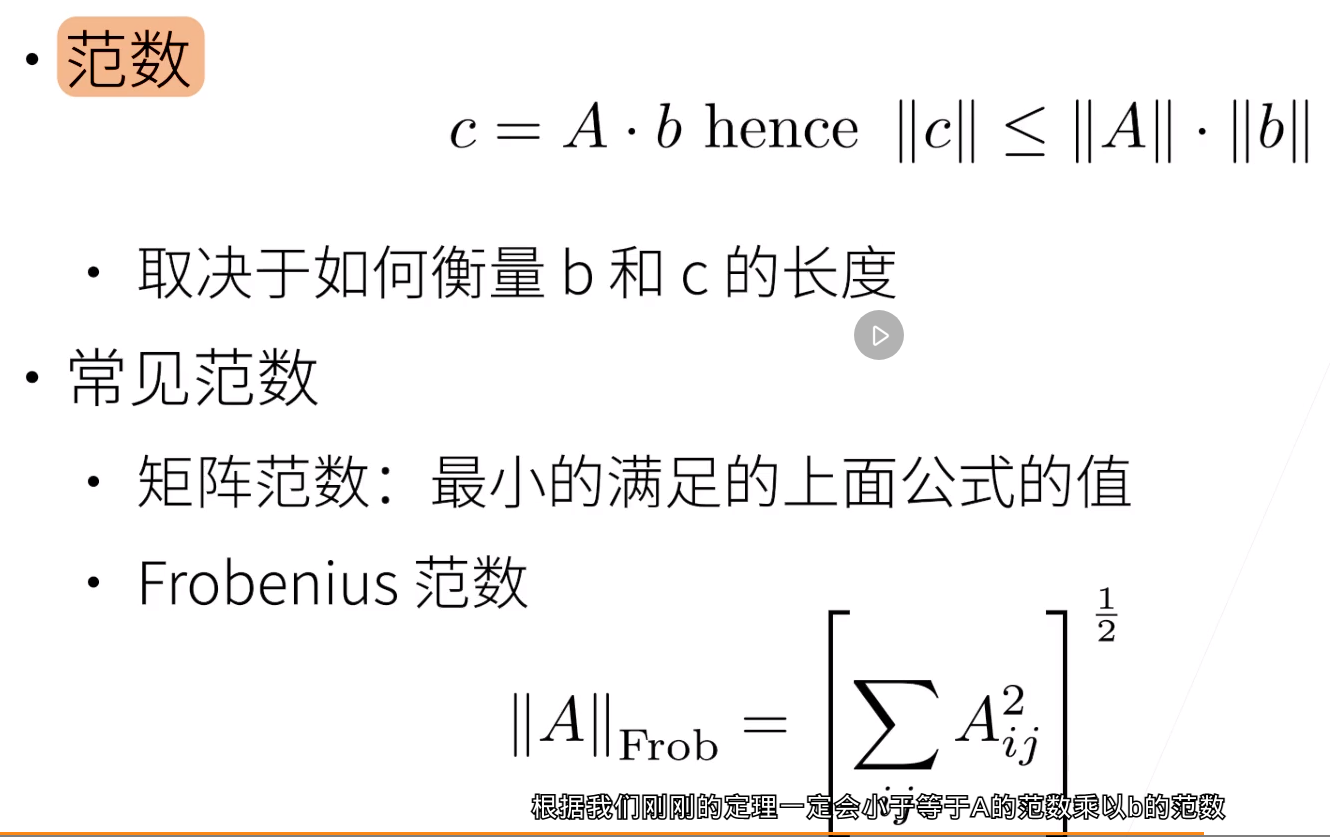
$L_2$*范数*是向量元素平方和的平方根：
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$$

In [30]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

$L_1$范数，它表示为向量元素的绝对值之和：
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|$$

In [31]:
torch.abs(u).sum()

tensor(7.)

矩阵
的*Frobenius范数*（Frobenius norm）是矩阵元素平方和的平方根：
$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}$$

In [32]:
torch.ones(4,9),torch.norm(torch.ones((4, 9)))

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))